# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("keys.env")

True

In [3]:
# Retrieve API key and store as Python variable
api_key = os.getenv("quandL_API_KEY")
#type(api_key)


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
btc_url
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18615700,
   'total_supply': 18615700,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 32262.0,
     'volume_24h': 41194773393,
     'market_cap': 603151882470,
     'percentage_change_1h': -1.98727067678515,
     'percentage_change_24h': -5.62862365742438,
     'percentage_change_7d': 0.605654756698998,
     'percent_change_1h': -1.98727067678515,
     'percent_change_24h': -5.62862365742438,
     'percent_change_7d': 0.605654756698998},
    'CAD': {'price': 41230.836,
     'volume_24h': 52646920396.254,
     'market_cap': 770828105796.66,
     'percent_change_1h': -1.98727067678515,
     'percent_change_24h': -5.62862365742438,
     'percent_change_7d': 0.605654756698998}},
   'last_updated': 1612116187}},
 'metadata': {'timestamp': 1612116187,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [7]:
# Fetch current BTC price
btc_price = btc_response['data']['1']['quotes']['CAD']['price']
btc_price

41230.836

In [8]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114480948,
   'total_supply': 114480948,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1288.99,
     'volume_24h': 24179221836,
     'market_cap': 147564772711,
     'percentage_change_1h': -1.83788540403549,
     'percentage_change_24h': -5.82244014249834,
     'percentage_change_7d': 4.69578611893687,
     'percent_change_1h': -1.83788540403549,
     'percent_change_24h': -5.82244014249834,
     'percent_change_7d': 4.69578611893687},
    'CAD': {'price': 1647.32922,
     'volume_24h': 30901045506.408,
     'market_cap': 188587779524.658,
     'percent_change_1h': -1.83788540403549,
     'percent_change_24h': -5.82244014249834,
     'percent_change_7d': 4.69578611893687}},
   'last_updated': 1612116038}},
 'metadata': {'timestamp': 1612116038,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [9]:
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']
eth_price

1647.32922

In [10]:
# Compute current value of my crpto
my_btc_value =  btc_price * BTC
my_btc_value

49477.0032

In [11]:
# Campute current vaule of my eth
my_eth_value = eth_price*ETH
my_eth_value

8730.844866

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49477.00
The current value of your 5.3 ETH is $8730.84


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Retrieve API key and store as Python variable
api_key = os.getenv("ALPACA_API_KEY")
type(api_key)

str

In [16]:
# Retrieve API key and store as Python variable
api_key = os.getenv("ALPACA_SECRET_KEY")
type(api_key)

str

In [17]:
# Format current date as ISO format

from datetime import date
today = date.today().isoformat()
print("Today's date:", today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df



# Preview DataFrame
df_portfolio.head()

Today's date: 2021-01-31


AGG                                        SPY  \
                             open    high      low   close    volume    open   
time                                                                           
2020-09-08 00:00:00-04:00  118.34  118.46  118.200  118.23  11938683  336.71   
2020-09-09 00:00:00-04:00  118.39  118.39  118.040  118.19  10977908  337.55   
2020-09-10 00:00:00-04:00  118.09  118.29  118.015  118.23   7983732  342.15   
2020-09-11 00:00:00-04:00  118.42  118.49  118.240  118.36  11853287  335.82   
2020-09-14 00:00:00-04:00  118.47  118.49  118.310  118.37  11279340  337.49   

                                                                
                             high       low   close     volume  
time                                                            
2020-09-08 00:00:00-04:00  342.64  332.8800  333.26  196953429  
2020-09-09 00:00:00-04:00  342.46  336.6100  339.76  156548054  
2020-09-10 00:00:00-04:00  342.53  332.8500  333.92  148070421  
2020-09-11 00:00:00-04:00  336.97  331.0000  334.08  140223556  
2020-09-14 00:00:00-04:00  340.38  334.2208  338.42  110083883

In [18]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"][0])
spy_close_price = float(df_portfolio["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.23
Current SPY closing price: $333.26


In [19]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16663.00
The current value of your 200 AGG shares is $23646.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

df_savings = pd.DataFrame([crypto, shares],index = ["crypto", "shares"], columns = ["amount"])

# Display savings DataFrame
display(df_savings)


amount
crypto  58207.848066
shares  40309.000000

<AxesSubplot:title={'center':'Composition of Savings'}, ylabel='amount'>

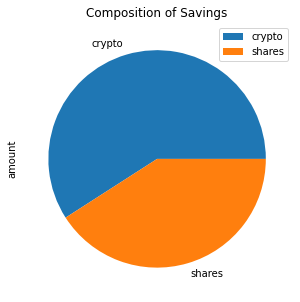

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Savings", figsize=(5,5))

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (sum(df_savings ["amount"]))

# Validate saving health
# display(df_savings)

if total_savings > emergency_fund:
    print("congratulations for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("congratulats on reaching this financial goal")
elif total_savings < emergency_fund:
    print(f"[You are {total_savings - emergency_fund} dollars away]")

congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
ticker_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 30

In [26]:
# Printing the simulation input data
ticker_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*num_sims
)

MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5         6    \
0      1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1      0.999799  0.996904  1.003518  0.996056   1.013469  0.988805  1.004520   
2      0.991682  1.004924  1.009273  1.001878   1.010938  0.983050  1.010039   
3      1.008201  1.008092  0.993630  1.005981   1.016436  0.986941  1.022591   
4      1.013423  1.009216  0.990526  1.015533   1.021618  0.996095  1.012684   
...         ...       ...       ...       ...        ...       ...       ...   
7556  10.713911  5.318677  6.125224  3.937642  10.118798  4.778027  5.851094   
7557  10.669924  5.322960  6.135518  3.938533  10.129706  4.869138  5.831793   
7558  10.631534  5.371433  6.214509  3.936738   9.984096  4.915275  5.828368   
7559  10.608615  5.453093  6.190075  3.930175  10.035719  4.874157  5.797403   
7560  10.705747  5.425839  6.142217  3.914054   9.941251  4.880569  5.802316   

           7         8         9    ...        990       991       992  \
0     1.000000  1.000000  1.000000  ...   1.000000  1.000000  1.000000   
1     0.998608  1.004923  0.987550  ...   1.008360  0.978378  0.999585   
2     1.000867  0.988867  0.994454  ...   1.025993  0.978389  1.006554   
3     0.991535  0.994008  0.991100  ...   1.020004  0.974299  1.011428   
4     0.982459  0.988645  0.991373  ...   1.005167  0.971139  1.018031   
...        ...       ...       ...  ...        ...       ...       ...   
7556  5.107568  7.346512  9.353123  ...  21.839420  8.521913  8.190637   
7557  5.024559  7.360350  9.293192  ...  21.837504  8.437797  8.092149   
7558  5.027611  7.572535  9.201605  ...  21.979741  8.480696  8.173438   
7559  5.023818  7.556543  9.216228  ...  22.119427  8.435159  7.993753   
7560  5.012514  7.583814  9.160492  ...  21.662946  8.426601  7.972360   

            993       994        995       996       997       998        999  
0      1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  
1      1.011929  1.013430   1.007319  0.994813  0.994436  0.993708   1.003565  
2      1.025730  1.010429   1.009359  0.996213  0.996682  0.991536   0.997448  
3      1.040735  1.011128   1.011824  0.994316  0.996729  1.007176   1.001790  
4      1.029216  1.009325   1.016721  0.990393  0.997429  1.015840   1.008872  
...         ...       ...        ...       ...       ...       ...        ...  
7556  28.703528  7.116181  10.911922  6.064440  8.411864  1.369794  15.345751  
7557  28.499695  7.119138  11.009389  6.121390  8.479348  1.363885  15.314296  
7558  28.701257  7.139125  10.952071  6.105403  8.451039  1.367637  15.301718  
7559  28.921277  7.179009  10.884629  6.120127  8.422642  1.366516  15.343189  
7560  29.068782  7.209391  10.942581  6.133369  8.390707  1.369555  15.099690  

[7561 rows x 1000 columns]

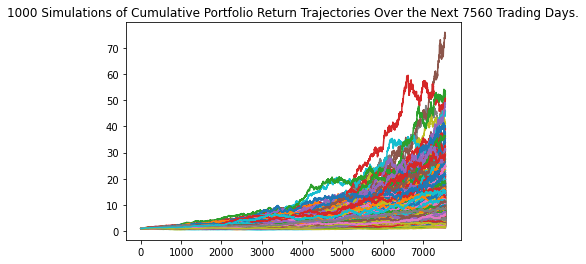

In [31]:
# Plot simulation outcomes

line_plot = MC.plot_simulation()

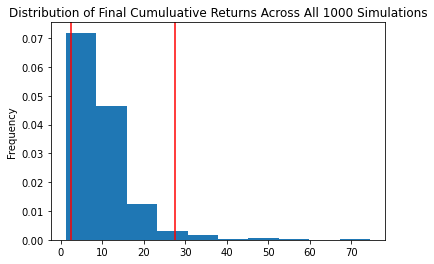

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')


### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               9.874793
std                6.977004
min                1.206803
25%                5.361989
50%                8.222940
75%               12.510374
max               74.524618
95% CI Lower       2.359768
95% CI Upper      27.482721
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47195.36 and $549654.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70793.04 and $824481.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims_5Y = 5

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5Y = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 500,
    num_trading_days = 252*num_sims_5Y
)

MC_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.010557  1.002574  0.999255  1.007492  1.007018  0.993398  1.007848   
2     1.019240  1.000873  0.993662  1.006609  1.011006  0.991067  1.005494   
3     1.023783  0.997880  0.987789  0.992817  1.016225  0.987831  0.999678   
4     1.030772  0.987628  0.985762  0.994231  1.018075  1.004146  0.996961   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.332105  1.250122  1.300619  1.085262  1.206234  1.644459  1.328803   
1257  1.333409  1.252398  1.306263  1.086332  1.194191  1.617025  1.341955   
1258  1.322070  1.249299  1.309612  1.069464  1.198556  1.616796  1.336851   
1259  1.316558  1.262768  1.310410  1.063616  1.206737  1.611311  1.343643   
1260  1.306719  1.274764  1.322833  1.064382  1.214259  1.610519  1.350800   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.993395  1.006627  1.001812  ...  0.999269  0.995509  1.003326   
2     0.997918  1.007303  1.000782  ...  0.995228  0.987969  1.010039   
3     0.984595  1.007657  0.998782  ...  0.990596  0.987415  1.004534   
4     0.985500  1.007370  0.996912  ...  0.994913  0.986476  1.008005   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.784600  1.166606  0.954091  ...  1.164757  1.345723  1.119081   
1257  1.786991  1.166326  0.956412  ...  1.169753  1.342756  1.122653   
1258  1.790615  1.168648  0.947340  ...  1.172543  1.349582  1.126525   
1259  1.780346  1.154072  0.947665  ...  1.177358  1.339710  1.131489   
1260  1.760202  1.155397  0.945325  ...  1.198564  1.339217  1.136169   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.001961  1.001134  0.992544  1.005458  0.997675  1.002965  1.006465  
2     1.001054  0.999243  0.995571  1.004245  1.006439  1.010944  1.009133  
3     1.003873  1.001383  0.998117  1.014293  1.009242  1.003707  1.021511  
4     1.008781  1.014124  1.002626  1.024736  1.004572  1.001398  1.014105  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.099307  1.070307  2.039609  0.763648  1.437566  1.286127  1.271471  
1257  1.108597  1.071005  2.044365  0.761398  1.433508  1.293706  1.275633  
1258  1.106222  1.078989  2.026903  0.767812  1.437927  1.317733  1.275626  
1259  1.110165  1.076170  2.030365  0.763778  1.436805  1.313840  1.281629  
1260  1.109227  1.067844  2.048672  0.757867  1.412367  1.317465  1.291909  

[1261 rows x 500 columns]

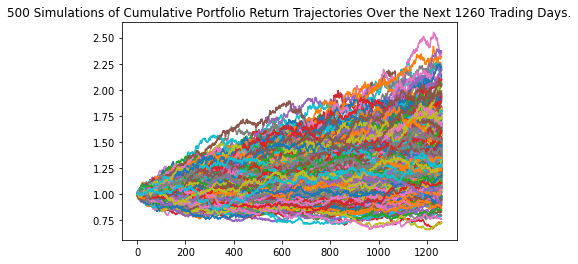

In [38]:
# Plot simulation outcomes
line_plot = MC_5Y.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_5Y_sim_plot.png", bbox_inches="tight")

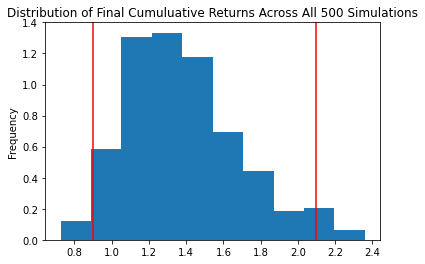

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5Y.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5Y = MC_5Y.summarize_cumulative_return()

# Print summary statistics
print(tbl_5Y)

count           500.000000
mean              1.379488
std               0.305659
min               0.725082
25%               1.163854
50%               1.334269
75%               1.562871
max               2.359788
95% CI Lower      0.897191
95% CI Upper      2.095364
Name: 1260, dtype: float64


In [42]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5Y = round(tbl_5Y[8]*20000,2)
ci_upper_5Y = round(tbl_5Y[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5Y} and ${ci_upper_5Y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $17943.82 and $41907.27


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims_10Y = 10

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10Y = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 500,
    num_trading_days = 252*num_sims_10Y
)

MC_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.990193  0.996800  0.994398  1.007522  0.998560  1.005312  1.000794   
2     0.979541  0.995993  1.003581  1.013974  1.003342  1.012615  1.002758   
3     0.977144  0.991353  1.008692  1.015852  1.007983  1.012107  1.001562   
4     0.967113  0.998910  1.017028  1.018747  1.009048  1.021738  1.013201   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.349804  1.341531  1.364092  2.264788  1.860800  2.820394  1.957479   
2517  2.335519  1.334174  1.362390  2.248737  1.861640  2.822453  1.973029   
2518  2.352145  1.323744  1.360119  2.254781  1.867102  2.810891  1.971171   
2519  2.357128  1.330342  1.368698  2.241007  1.858310  2.798542  1.988746   
2520  2.332443  1.327883  1.369351  2.233539  1.858557  2.784257  1.989915   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.987723  0.996278  1.000099  ...  1.009698  0.997911  0.999703   
2     0.982343  0.989471  0.999476  ...  1.003720  0.998704  1.012543   
3     0.975300  0.995024  1.002373  ...  0.996569  0.997307  1.011422   
4     0.975812  0.988045  0.995787  ...  0.998841  0.992058  1.008069   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.243200  3.532513  1.979139  ...  3.436817  3.341834  2.010225   
2517  1.240252  3.506535  1.976250  ...  3.450379  3.359358  2.021515   
2518  1.264854  3.522837  1.969237  ...  3.450678  3.339590  2.016072   
2519  1.269731  3.539420  1.969375  ...  3.491245  3.311646  2.022835   
2520  1.268192  3.554971  1.954260  ...  3.509605  3.310849  2.029548   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.999685  1.002220  0.998321  1.012539  1.002236  0.996785  1.014608  
2     0.982907  0.993217  0.998154  1.016922  1.005131  0.985956  1.022071  
3     0.977496  0.994070  0.993087  1.011058  1.009996  0.991777  1.030747  
4     0.970212  0.999606  0.983377  1.007004  1.010122  1.002461  1.033276  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.322386  2.385609  2.510508  2.011669  2.346971  1.225829  2.436559  
2517  2.316311  2.387874  2.495904  2.019227  2.348067  1.216431  2.414879  
2518  2.343046  2.406689  2.484976  2.041451  2.353523  1.219425  2.407554  
2519  2.327434  2.399379  2.487036  2.038800  2.358312  1.215614  2.416395  
2520  2.317345  2.415589  2.482127  2.063470  2.356966  1.210488  2.419803  

[2521 rows x 500 columns]

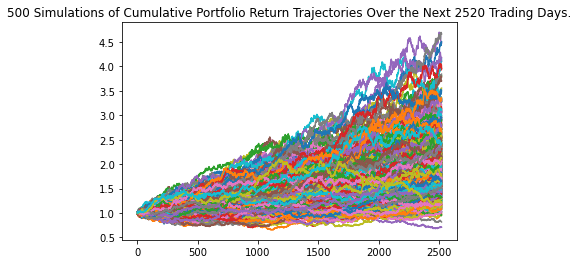

In [46]:
# Plot simulation outcomes
line_plot = MC_10Y.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_10Y_sim_plot.png", bbox_inches="tight")

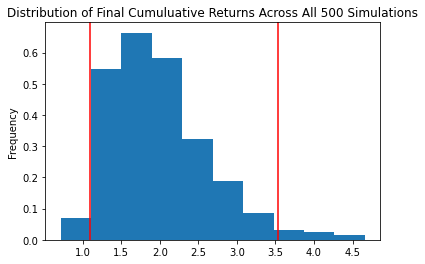

In [48]:
# Plot probability distribution and confidence intervals

dis_plot_ten = MC_10Y.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10Y = MC_10Y.summarize_cumulative_return()

# Print summary statistics
print(tbl_10Y)

count           500.000000
mean              1.985632
std               0.638354
min               0.711072
25%               1.534133
50%               1.883929
75%               2.317469
max               4.659922
95% CI Lower      1.094850
95% CI Upper      3.533422
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10Y = round(tbl_10Y[8]*20000,2)
ci_upper_10Y = round(tbl_10Y[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10Y} and ${ci_upper_10Y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $21897.0 and $70668.44
